# Projeto  - Ciência dos Dados

**Alunos:**

Gabriela Mitu

Fernando Avila

--------
## Introdução

O câncer de mama se caracteriza pela proliferação anormal, de forma rápida e desordenada, das células do tecido mamário. Ele representa o principal tipo de câncer na mulher. A doença se desenvolve em decorrência de alterações genéticas, podendo alterar a habilidade da célula de manter sua divisão e reprodução sob controle, produzindo células em excesso, formando o tumor, o qual pode ser benigno (não perigoso para a saúde) ou maligno (tem o potencial de ser perigoso).

Os benignos não são considerados cancerígenos: suas células têm aparência próxima do normal. Elas crescem lentamente e não invadem os tecidos vizinhos, nem se espalham para outras partes do corpo. Já os tumores malignos são cancerosos. Caso suas células não sejam controladas, podem crescer e invadir tecidos e órgãos vizinhos, eventualmente se espalhando para outras partes do corpo.

Este tipo de câncer, segundo a Agência Internacional de Pesquisa em Câncer (IARC), é o quinto em questão de mortalidade no mundo, sendo estimadas mais de 627 mil mortes em 2018 - o que representa 6,6% do total de mortes por todos os tipos da doença. A pesquisa também aponta que uma a cada quatro mulheres que têm um caso de câncer diagnosticado têm câncer de mama, representando 24,2% do total.

O câncer de mama geralmente apresenta um bom índice de cura, principalmente quando diagnosticado em sua fase precoce. Visto isso, a previsão da doença é considerada um dos mais importantes assuntos na seção de análise de dados clínicos. Desta forma, a mineração de dados transforma a grande coleção de dados brutos de assistência médica em informações que podem auxiliar na tomada de decisões.

Portanto, com o objetivo de apoiar este estudo, foi escolhido este tema de análise de câncer de mama para o Projeto 2 de Ciência de Dados com a uso de ferramentas como o python para desenvolver um Machine Learning através de um DataSet do repositório da UCI.

O método utilizado será o de aprendizado supervisionado com o intuito de prever um rótulo (se alguém ser diagnosticado ou não com o câncer).
Para atingir esse objetivo, foram selecionados alguns atributos a serem analisados, contidos nas colunas do dataset.  Eles estão relacionados com exames de pacientes. É importante ressaltar que apenas um destes fatores isolados não é suficiente para o surgimento de uma doença, porém a combinação de alguns pode ser determinante.


**Atributos que serão analisado**

- Diagnosis: Diagnóstico (M = maligno, B = benigno)

- O Data Set é dividido em três partes: Média (média de todas as células, colunas 3-13), Erro padrão (erro padrão de todas as células, colunas 13-23) e Pior (significa a pior célula, colunas 23-32) e cada um contém 10 parâmetros (valores calculados para cada núcleo celular):
    - Radius: Raio (média das distâncias do centro aos pontos no perímetro)
    - Texture: Textura (desvio padrão dos valores da escala de cinza)
    - Perimeter: Perímetro
    - Area: Área
    - Smoothness: Suavidade (variação local nos comprimentos do raio)
    - Compactness: Compacidade (perímetro ^ 2 / área - 1,0)
    - Concavity: Concavidade (severidade das porções côncavas do contorno)
    - Concave points: Pontos côncavos (número de partes côncavas do contorno)
    - Symmetry: Simetria
    - Fractal Dimension: Dimensão fractal ("aproximação da costa" - 1)

____
## Mecanismo

A realização do projeto contará com vários algoritmos como a Regressão Logística, SVM, Random Forest, e K Neighbors Classifier - todos já frequentemente utilizado nas ciência biológicas, assim como no estudo de doenças cardiovasculares para estudar variáveis independentes. Cada um resultará em uma acurácia diferente devido à técnica singular deles. Assim, será possível, por meio da comparação entre os resultados, fazer um estudo de qual será mais eficiente para o desenvolvimento da machine learning.

----------



## Preparando o ambiente no jupyter:

In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn import metrics
from sklearn.svm import SVC

In [68]:
dados=pd.read_csv("data.csv")

_______
## Adaptação do DataSet 

In [69]:
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Observando cada categoria a ser considerada, pode-se perceber que há uma coluna chamada "Unnamed:32" onde todos os valores são "Nan", ou seja, significa que todos os valores são nulos nesta coluna, portanto, não podemos usar esta coluna para nossa análise. Outro atributo que será retirado é o "Id", que não será relevante também para a pesqusia.

Então, o código abaixo, tira ambos do Data Set.

In [70]:
# Tirando a coluna Unnamed: 32
dados.drop("Unnamed: 32",axis=1,inplace=True)

# Tirando a coluna Id
dados.drop("id",axis=1,inplace=True)

In [71]:
print(len(dados.columns))

31


Como foi explicado anteriormente, pode-se dividir o Data Set em três partes: Média, Erro padrão, e Pior. Então, em código divide-se as colunas:

In [72]:
features_mean= list(dados.columns[1:11])
features_se= list(dados.columns[11:20])
features_worst=list(dados.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


Agora, sobre a coluna de diagnóstico que se encontra fora dessa classificação que foi feita no código anterior, é possível mapeá-lo para um valor inteiro, já que é um objeto

In [73]:
dados['diagnosis']=dados['diagnosis'].map({'M':1,'B':0})

Assim, maligno será equivalente a 1 (um) e benigno a 0 (zero)

A fim de observar as variáveis mais relevantes e realizar uma comparação de valores entre os casos de câncer benigno e maligno, pode-se usar o plote de histogramas dos dois casos. Nesta análise será mantida apenas as colunas da divisão de mean - será mais significativo e objetivo que observar o desempenho na divisão de Erro padrão ou em Worst:

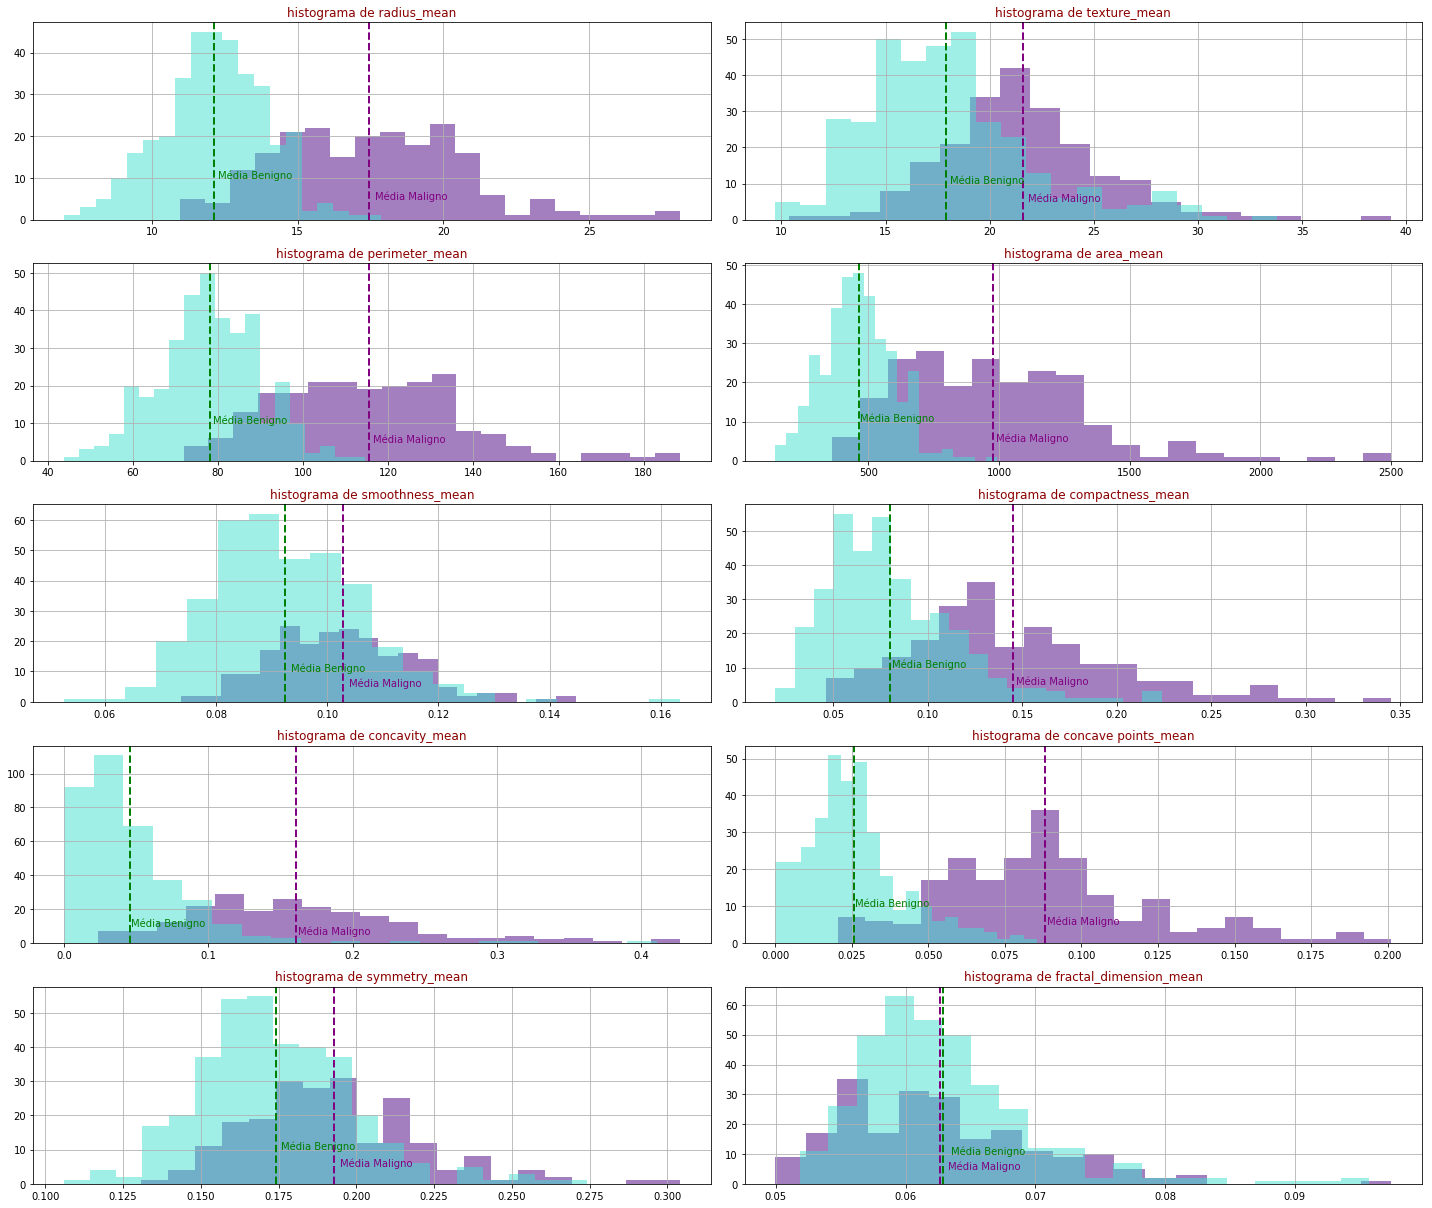

In [79]:
maligno=dados[dados['diagnosis']==1]
benigno=dados[dados['diagnosis']==0]


def verticalLine(plot, x, y, color, nome):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.01*x, y, nome, color=color)    


def draw_histograms(dataframe, dataframe2, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        plot1=dataframe[feature].hist(bins=20,ax=ax,color='indigo', alpha=0.5, label='Maligno')
        plot2=dataframe2[feature].hist(bins=20,ax=ax,color='turquoise', alpha=0.5, label='Benigno')
        verticalLine(plot1, dataframe[feature].mean(), 5, "purple", "Média Maligno")
        verticalLine(plot2, dataframe2[feature].mean(), 10, "green", "Média Benigno")

        ax.set_title('histograma de '+feature,color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(maligno[features_mean],benigno[features_mean],benigno[features_mean].columns,6,2)

Na série de histogramas plotados, pode-se observar que fractal_dimension é uma variável considerada menos relevante para conseguir distinguir entre um caso benigno e maligno de câncer de mama.

Além disso, observa-se que a média de todas as variáveis do câncer maligno é maior que o benigno, algo que pode ser levado em conta nos exames e diagnósticos.

________
## Visualização de dados

Para se ter uma visão geral dos dados e variáveis a serem analisadas, faz-se o comando describe:

In [74]:
dados.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


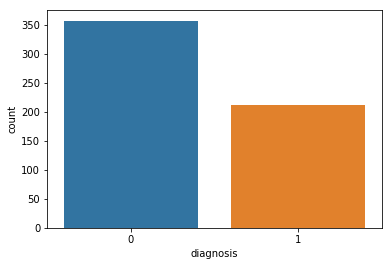

In [75]:
sns.countplot(dados['diagnosis'],label="Count")

No gráfico acima, pode-se observar que existe um maior número de casos benignos do que malignos de estágios de câncer nesse Data Set.

Fazendo um gráfico de correlação com HeatMap, é possível analisar multicolinearidade entre as colunas, o que significa que uma está dependendo da outra. Deve-se evitar isso porque não há motivo de usar a mesma coluna duas vezes.

Para fazer esse estudo de forma organizada, primeiramente, será realizado com as features da parte Média (divisão do Data Set):

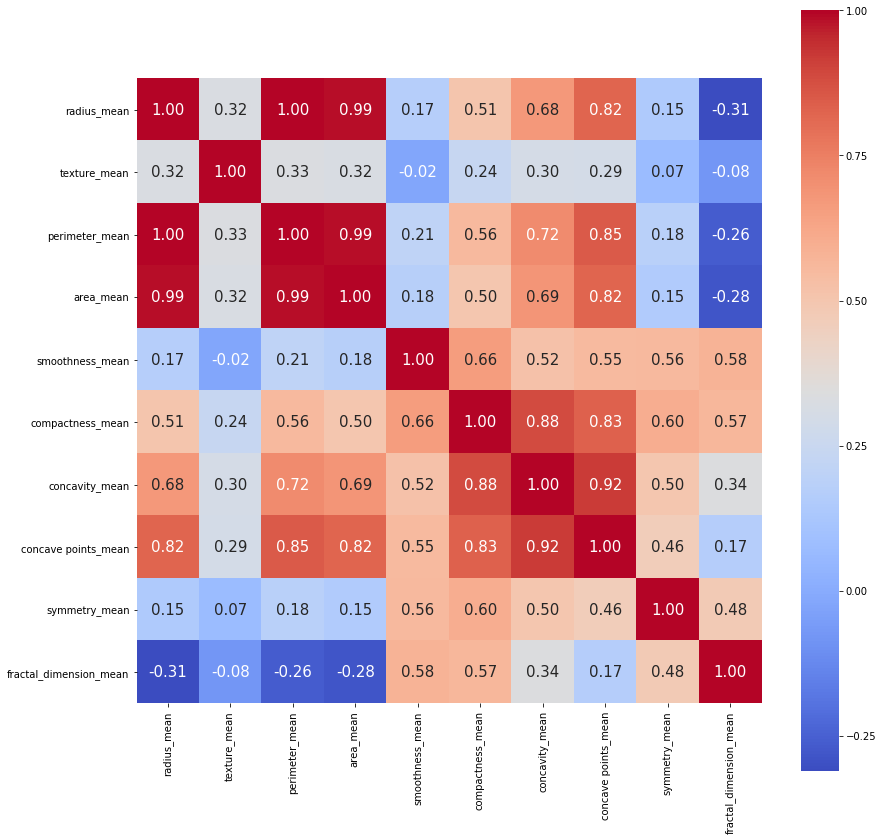

In [10]:
corr = dados[features_mean].corr() # Para achar correlação
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') 

**Observações:**

- O raio, o perímetro e a área estão altamente correlacionados conforme o esperado de suas relações, portanto, será possível usar qualquer um deles.
- Compactness_mean, concavity_mean e concavepoint_mean são altamente correlacionados, portanto pode-se escolher apenas compactness_mean para ser usado na pesquisa.
- Os parâmetros selecionados serão, então, perimeter_mean, texture_mean, compactness_mean, symmetry_mean, smoothness_mean.

________
# Previsão  - Média

Primeiramente as variáveis de média (mean) serão utilizados para a previsão

In [11]:
prediction_var_media = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

Separando os dados em treino e teste e observando o tamanho de cada um:

In [12]:
train, test = train_test_split(dados, test_size = 0.3)
print("Tamanho - treino: ", train.shape)
print("Tamanho - teste: ", test.shape)

Tamanho - treino:  (398, 31)
Tamanho - teste:  (171, 31)


### Classificador Random Forest 

A Random Forest, como o próprio nome indica, consiste em um grande número de Decision Trees individuais que funcionam como um conjunto. Cada árvore individual na floresta aleatória cede uma previsão de classe e a classe com mais "votos" se torna a previsão do modelo

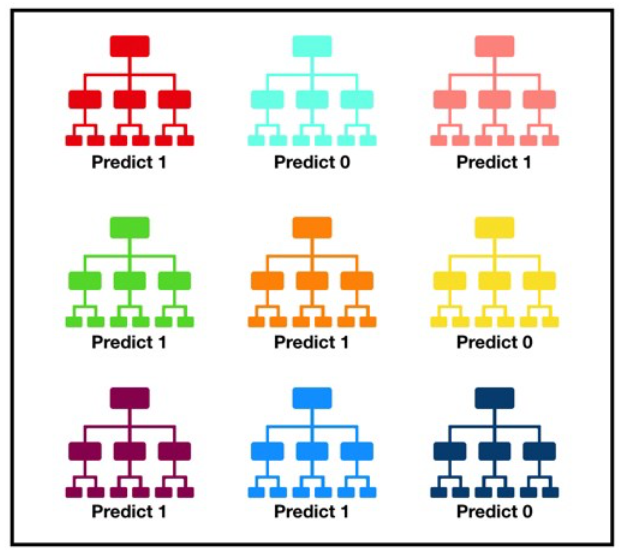

O conceito fundamental por trás da floresta aleatória é simples, mas poderoso - a sabedoria da maioria. Em termos de ciência de dados, a razão pela qual o modelo aleatório de floresta funciona tão bem é que um grande número de modelos (árvores) relativamente não correlacionados que operam como um comitê consegue superar modelos constituintes individuais.

A razão para esse efeito é que as árvores se protegem de seus erros individuais (desde que nem sempre erram na mesma direção). Enquanto algumas árvores podem estar erradas, muitas outras estão certas, então, como um grupo, as árvores podem se mover na direção correta.

Agora, antes de usar apenas os parâmetros que foram separados anteriormente, será verificado com todas as variáveis:

In [13]:
prediction_media_all = features_mean

In [14]:
train_X= train[prediction_media_all]
train_y= train.diagnosis
test_X = test[prediction_media_all]
test_y = test.diagnosis

In [15]:
model=RandomForestClassifier(n_estimators=100)

In [16]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.935672514619883


A acurácia desse teste deu aproximadamente 93.5% de acerto, o que é bem alto já. Mas ainda será verificado apenas com as variáveis consideradas mais interessantes para a previsão. Antes disso, pode-se deixar já pronto um código do nível de importância de cada variável que funciona com o método de Random Trees e, para explorá-la, usa-se todas as variáveis (sem filtro)

In [17]:
featimp = pd.Series(model.feature_importances_, index=prediction_media_all).sort_values(ascending=False)
print(featimp)

concave points_mean       0.257318
area_mean                 0.185271
radius_mean               0.138060
concavity_mean            0.128558
perimeter_mean            0.124362
compactness_mean          0.053312
texture_mean              0.046587
smoothness_mean           0.030797
symmetry_mean             0.018482
fractal_dimension_mean    0.017253
dtype: float64


**Obs.:** Funciona apenas com Random Trees, por isso já é preparado aqui o código, mas para deixar fluido o estudo das previsões e métodos, essa análise será deixada adiante

Deixando então o código pronto para explorá-lo posteriormente, será dada continuidade à previsão, desta vez usando as variáveis filtradas:

In [18]:
train_X = train[prediction_var_media]
train_y = train.diagnosis
test_X = test[prediction_var_media]
test_y = test.diagnosis

In [19]:
model=RandomForestClassifier(n_estimators=100)

In [20]:
model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
prediction=model.predict(test_X)

In [22]:
metrics.accuracy_score(prediction,test_y)

0.8888888888888888

A acurácia desse teste deu aproximadamente 88.8% de acerto, um valor alto, mas a acurácia desse grupo seleto é menor do que utilizando todas as variáveis.

### Suport Vector Machine SVM

Geralmente, o Support Vector Machines é considerado uma abordagem de classificação, mas pode ser empregado em ambos os tipos de problemas de classificação e regressão. Ele pode manipular facilmente várias variáveis contínuas e categóricas. O SVM constrói um hiperplano no espaço multidimensional para separar diferentes classes. O SVM gera o hiperplano ideal - um plano de decisão que separa entre um conjunto de objetos com diferentes associações de classe - de maneira iterativa, que é usada para minimizar um erro. A idéia central do SVM é encontrar um hiperplano marginal máximo (MMH) que melhor divida o conjunto de dados em classes.

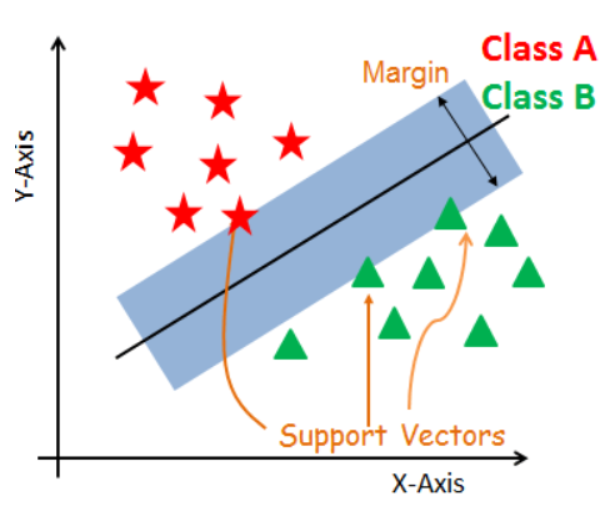

Esses "Support Vectors" (ou vetores de suporte) no gráfico acima são os pontos de dados mais próximos do hiperplano. Esses pontos definirão melhor a linha de separação calculando as margens e são mais relevantes para a construção do classificador.

Ele funciona da seguinta forma: 

1. Gera hiperplanos que segregam as classes da melhor maneira. Na figura a seguir do lado esquerdo são mostrados três hiperplanos - em preto, azul e laranja. O azul e o laranja têm um erro de classificação mais alto, mas o preto separa as duas classes corretamente.

2. É selecionado o hiperplano direito com a segregação máxima dos pontos de dados mais próximos, como mostra a figura do lado direito.

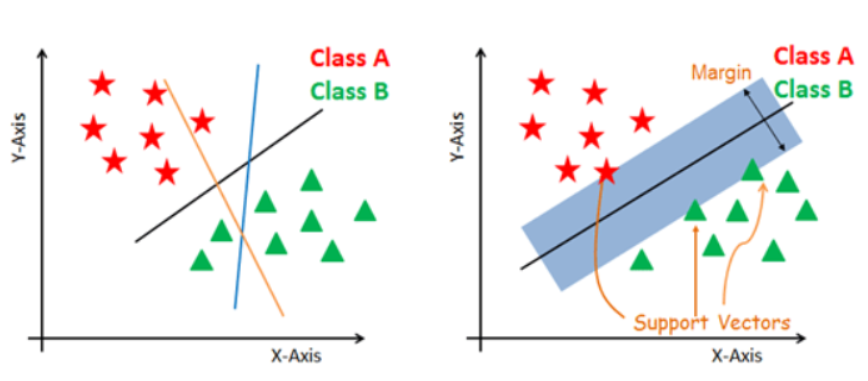

Agora, assim como em Random Forests, antes de usar apenas os parâmetros que foram separados, será verificado com todas as variáveis:

In [23]:
train_X= train[prediction_media_all]
train_y= train.diagnosis
test_X = test[prediction_media_all]
test_y = test.diagnosis

In [24]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

C:\Users\gabri\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6374269005847953

A acurácia se deu em 63.7% aproximadamente. Agora, será analisado com a filtragem das variáveis:

In [25]:
train_X = train[prediction_var_media]
train_y = train.diagnosis
test_X = test[prediction_var_media]
test_y = test.diagnosis

In [26]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

C:\Users\gabri\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8713450292397661

A acurácia desta vez deu aproximadamente 87.1%, bem maior que a com todas as variáveis de SVM, menor que Random Forest, mas ainda é relativamente alto. Disso, pode-se presumir que a multi colinearidade esteja afetando significativamente a técnica de SVM

## Previsão - Worst (Pior)

Agora será utilizada para previsão a terceira parte: as variáveis de worst (pior)

### Suport Vector Machine SVM e Random Trees

In [27]:
prediction_var = features_worst

In [28]:
train_X = train[prediction_var]
train_y = train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [29]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

C:\Users\gabri\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6023391812865497

Novamente observa-se uma acurácia bem menor usando a técnica de SVM, então, será observada de Random Forest:

In [30]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9181286549707602

E, novamente, a acurácia se manteve bem maior que de SVM. Cerca de 95.9%, um pouco maior do que utilizando a previsão da média. Agora, será feito a previsão utilizando filtragem de relevância das variáveis:

In [31]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

perimeter_worst            0.256734
area_worst                 0.201369
concave points_worst       0.181489
radius_worst               0.152365
concavity_worst            0.069062
compactness_worst          0.051119
symmetry_worst             0.025404
texture_worst              0.025023
smoothness_worst           0.023040
fractal_dimension_worst    0.014394
dtype: float64


In [32]:
prediction_var = ['concave points_worst','radius_worst','area_worst','perimeter_worst','concavity_worst'] 

In [33]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [34]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9005847953216374

In [35]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

C:\Users\gabri\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5964912280701754

Analisando os resultados, Random Trees teve uma acurácia de cerca de 95.3% e SVM de 68.4%. Com base nos dados que foram obtidos até este momento, já se pode considerar Random Trees uma técnica melhor que SVM para ser utilizada nesse projeto. 

___
# Aperfeiçoamento com filtragem

A filtragem que foi feita anteriormente se baseou na análise visual de um HeatMap, observando as correlações entre as colunas e, então, selecionando aquelas consideradas mais significativas e desconsiderando as menos relevantes. Entretanto, há uma outra forma mais assertiva de verificar a influência de cada variável para a análise, que é por meio da codificação que foi feita anteriormente após o uso de Random Trees. Para facilitar a análise, foi printado o resultado - tanto de mean como de worst:

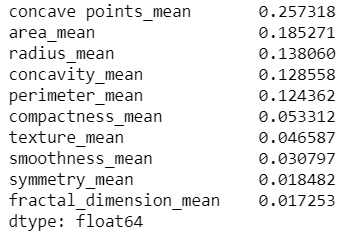

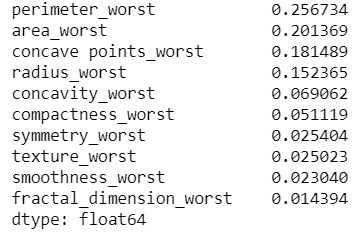

Nas duas segmentações as 5 variáveis que mais se destacaram na questão de relevância são concave points, perimeter, area, radius, area e concavity. Desta forma, pode-se usar elas para fazer a previsão. Como em maior parte, a relevância desses 5 foi maior em mean (média) e, além disso, foi visto que a acurácia foi melhor que em worst, então as previsões seguintes serão realizadas com a parte de mean:

In [81]:
prediction_var = ['concave points_worst','radius_worst','area_worst','perimeter_worst','concavity_worst'] 

In [82]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [83]:
model=RandomForestClassifier(n_estimators=100)

In [84]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9005847953216374

A maior acurácia obtida ainda foi a relacionada à média com todas as suas colunas. Entretanto, a remoção delas não aumentou a acurácia, pelo contrário, acabou reduzindo-a levemente.

Agora, para se ter uma análise mais expansiva acerca das técnicas utilizadas para previsão, serão observadas o desempenho de outros métodos de previsão:

## K-Neighbors Classifier

O KNN é um algoritmo de aprendizado não paramétrico - ou seja, a estrutura do modelo é determinada a partir do conjunto de dados - e preguiçoso. O algoritmo preguiçoso significa que ele não precisa de nenhum ponto de dados de treinamento para geração de modelo. Isso torna o treinamento mais rápido e a fase de teste mais lenta. Durante a fase de teste, o KNN precisa de mais tempo para verificar todos os pontos de dados e esta verificação exigirá mais memória para armazenar dados de treinamento.

Sobre o funcionamento, em KNN, K é o número de vizinhos mais próximos. Quando K = 1, o algoritmo é conhecido como o algoritmo vizinho mais próximo. Exemplificando, considerando que P1 seja o ponto para o qual o rótulo precisa prever, primeiro, é encontrado o ponto mais próximo de P1 e, em seguida, o rótulo do ponto mais próximo atribuído a P1. Depois é classificado os pontos pelo voto da maioria de seus k vizinhos. Cada objeto vota em sua classe e a classe com mais votos é tomada como previsão. Para encontrar pontos semelhantes mais próximos, encontra-se a distância entre pontos usando medidas de distância, como distância euclidiana, distância de Hamming, distância de Manhattan e distância de Minkowski.


A seguintes etapas básicasdo KNN são:
- Calcular distância;
- Achar o "neighbor" mais próximo;
- Votar os marcadores;

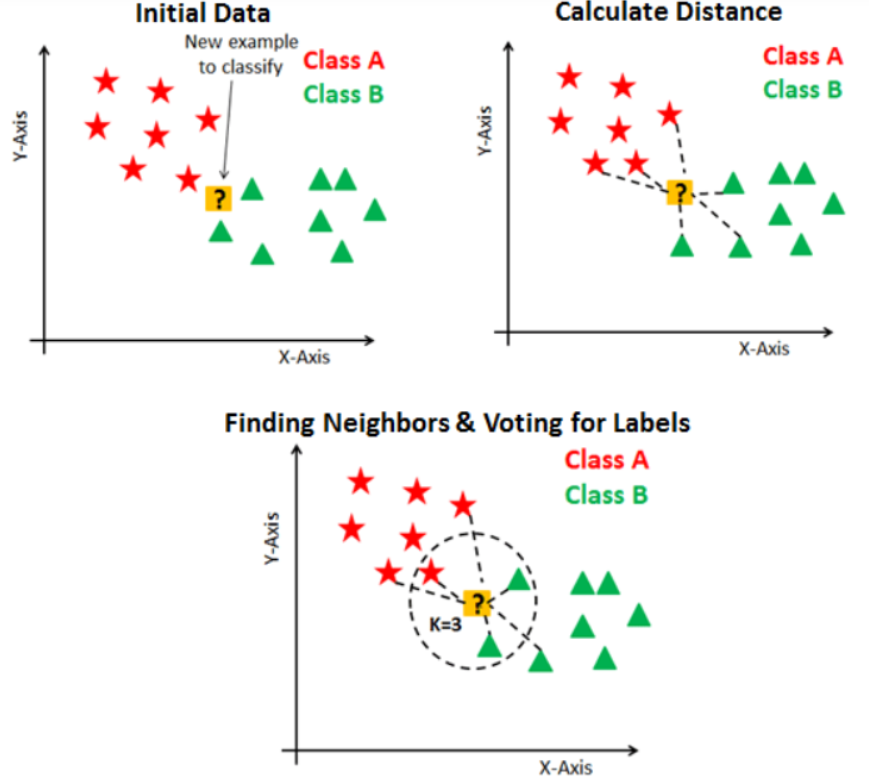

In [85]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(train_X, train_y)
    knn_scores.append(knn_classifier.score(test_X, test_y))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

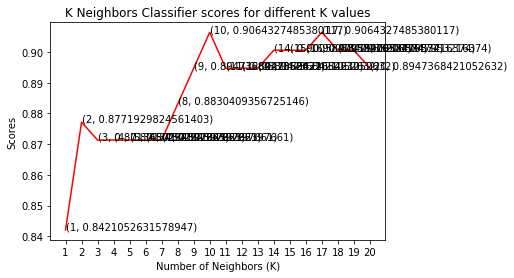

In [86]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
print('Acurácia: {}'.format(accuracy_score(test_y, y_pred)))

Acurácia: 0.9005847953216374


## Naive Bayes

In [88]:
def train_model(train_X, train_y, test_X, test_y, classifier, **kwargs):
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(train_X,train_y)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(train_X, train_y)
    test_accuracy = model.score(test_X, test_y)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

In [89]:
from sklearn.naive_bayes import GaussianNB

#Gaussian Naive Bayes
model = train_model(train_X, train_y, test_X, test_y, GaussianNB)

Train accuracy: 94.97%
Test accuracy: 90.64%


## Regressão Logística


A regressão logística faz predições para lidar com problemas que exigem uma estimativa de probabilidade e tem como "output" - discreto - zero ou um (0/1), além de ser utilizada para calcular a possibilidade de certo evento ocorrer.

Na regressão logística, a probabilidade de ocorrência de um evento pode ser estimada diretamente. Considerando que só há dois "outputs" (0/1) e "p" variáveis independentes, chega-se em:

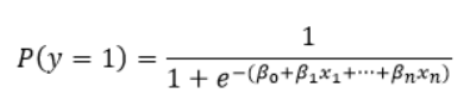

Os coeficiente B0, B1,..., são selecionados de forma que maximize a probabilidade da amostra ter sido observada.

Assim, o gráfico de uma regressão logística fica neste formato:

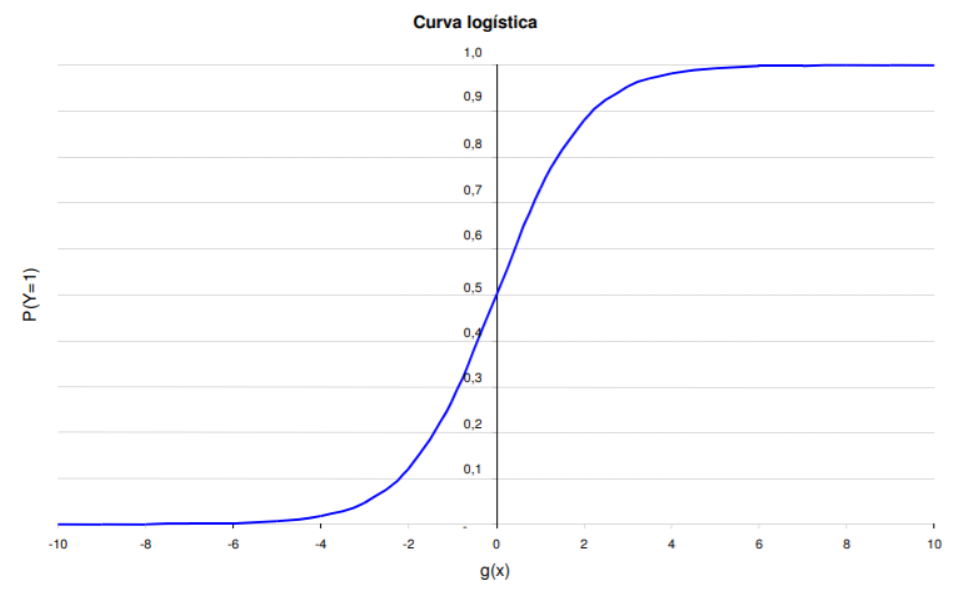

Observa-se ainda que:
- Quando g(x) tende a infinito, P(Y=1) tende a 1
- Quando g(x) tende a menos infinito, P(Y=1) tende a 0

In [102]:
train_X= train[prediction_media_all]
train_y= train.diagnosis
test_X = test[prediction_media_all]
test_y = test.diagnosis

In [103]:
model=RandomForestClassifier(n_estimators=100)

In [104]:
import statsmodels.formula.api as sm
model=sm.Logit(train_y,train_X)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.124403
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  398
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            9
Date:                Tue, 09 Jun 2020   Pseudo R-squ.:                  0.8091
Time:                        23:00:00   Log-Likelihood:                -49.513
converged:                       True   LL-Null:                       -259.32
                                        LLR p-value:                 8.952e-85
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
radius_mean               -7.6574      4.710     -1.626      0.104     -16.888       1.573
texture_mean               0.3398      0.075      4.556      0.000       0.194       0.486
perimeter_mean             0.6538      0.694      0.941      0.346      -0.707       2.015
area_mean                  0.0498      0.013      3.914      0.000       0.025       0.075
smoothness_mean           78.1253     41.283      1.892      0.058      -2.789     159.039
compactness_mean         -30.5242     27.945     -1.092      0.275     -85.295      24.247
concavity_mean            -0.5697      9.911     -0.057      0.954     -19.994      18.855
concave points_mean       90.3022     36.463      2.477      0.013      18.836     161.769
symmetry_mean             16.2734     11.450      1.421      0.155      -6.168      38.715
fractal_dimension_mean   -26.1747     87.156     -0.300      0.764    -196.997     144.647
==========================================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Na tabela-resumo da regressão logística, nota-se que algumas variáveis são mais importantes para a classificação do que outras. Adotando o valor de alfa como 5%, pode-se considerar que aqueles atributos que possuem um valor p inferior a tal alfa são mais essenciais na classificação, como concave points e area_mean, que possuem os menores valores. Ambos foram escolhidos nas previsões anteriores, o que sustenta a significância dessas variáveis para o estudo.

#### Acerto nas previsões

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs', multi_class='auto')


In [107]:
model.fit(train_X, train_y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [109]:
y_pred = model.predict(test_X)
reg=accuracy_score(test_y, y_pred)
print('Acurácia: {}'.format(reg))

Acurácia: 0.8947368421052632


# Conclusão

Em geral, os classificadores tiveram um bom desempenho, aproximadamente 90%, com exceção do SVM, o qual teve uma performance levemente menor.
O resultado após algumas variáveis serem retiradas (aperfeiçoamento) foi interessante ao mostrar resultados de acurácia muito próximos àqueles obtidos previamente. Entretanto, deve-se considerar que nessa segunda iteração vários exames foram desconsiderados. Isso mostra que na determinação do câncer de mama ser benigno ou maligno aqueles testes podem ser retirados sem grandes impactos na acurácia da previsão, o que implica um menor gasto com os exames por parte do hospital e uma demanda de tempo inferior por parte do paciente. Mesmo assim, vale salientar ainda que é provada uma acurácia levemente maior utilizando todas as variáveis de mean.


Além disso, conforme o uso de ferramentas semelhantes à aqui utilizada se tornar mais frequente e os dataframes se atualizarem com cada vez mais pacientes, o algoritmo terá  uma melhor base para aprendizagem. Dessa maneira, a tendência é que se torne cada vez mais preciso, fornecendo um diagnóstico ainda mais certeiro.


A utilidade de um algoritmo de previsão de doenças é marcante no campo da medicina. Classificadores como o desenvolvido neste projeto possuem a capacidade de otimizar a identificação doenças, fornecendo grande acurácia diagnóstica em um período de tempo curto. Ao facilitarem o reconhecimento de efermidades não apenas facilitam o trabalho de profissionais da saúde, mas também possibilitam o início de um tratamento mais cedo para o paciente. 
É importante  ressaltar que o classificador desenvolvido neste projeto para câncer de mama pode ser aplicado a diversas outras efermidades, em diferentes áreas da medicina.
Na verdade, uso de Machine Learning já foi documentado e vem sendo utilizado em áreas como detecção de doenças cardíacas, neurológicas e respiratórias.
Vale enfatizar que tais ferramentas não têm o intuito de substituir profissionais da saúde, mas sim de facilitar e otimizar seu trabalho.


Portanto, a implementação de algoritmos de previsão de doenças possui um potencial revolucionário no que tange à pratica de medicina tradicional, trazendo benefícios a todos os envolvidos.

__________________
## Referências

- https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
- https://www.cancer.org/content/dam/CRC/PDF/Public/8577.00.pdf
- https://pt.stackoverflow.com/
- https://dl.acm.org/doi/pdf/10.1145/3167918.3167930?download=true